In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import csv
from numpy import linalg
from sklearn import svm
from sklearn.metrics import confusion_matrix
from VCA import *

In [2]:
from itertools import product

def generate_monomials(variables, m):
    monomials = []
    for degree in range(m + 1):
        for powers in product(range(degree + 1), repeat=len(variables)):
            if sum(powers) == degree:
                monomial_parts = [variables[i] for i, power in enumerate(powers) for _ in range(power)]
                monomial = ' * '.join(monomial_parts) if monomial_parts else '1'
                monomials.append(monomial)
    
    return monomials

result = generate_monomials(['x', 'y'], 3)
print(result)


['1', 'y', 'x', 'y * y', 'x * y', 'x * x', 'y * y * y', 'x * y * y', 'x * x * y', 'x * x * x']


[(0.9997839974035867, 6.977873910641143e-06), (0.9785318412500416, 0.2081565632877966), (0.9128347141761013, 0.4075579706129489), (0.8097055971395445, 0.5873977946498684), (0.6683277304932316, 0.7439604240960854), (0.4994212567994837, 0.8662280286900899), (0.3081144033198042, 0.9517419718376942), (0.10464467642349908, 0.9954858977704881), (-0.1043101234427588, 0.9942828055482467), (-0.3085811091800138, 0.9514879509214407), (-0.4990212022730784, 0.8666036649616689), (-0.6698327757523719, 0.7422935676093928), (-0.8096209415780946, 0.5871634995656171), (-0.9141335637472361, 0.40624898718400887), (-0.9790040393208252, 0.2078633771880223), (-1.0009609264285029, -0.0003343815641372642), (-0.9787501937121906, -0.20869199546953804), (-0.9139487403118427, -0.4063960888633817), (-0.8085947381691185, -0.5873439198194479), (-0.6681792876059214, -0.7424747676045924), (-0.49905683148610047, -0.8666127062319638), (-0.30909045419239517, -0.9512612382162398), (-0.10523898486954428, -0.9946935969796453)

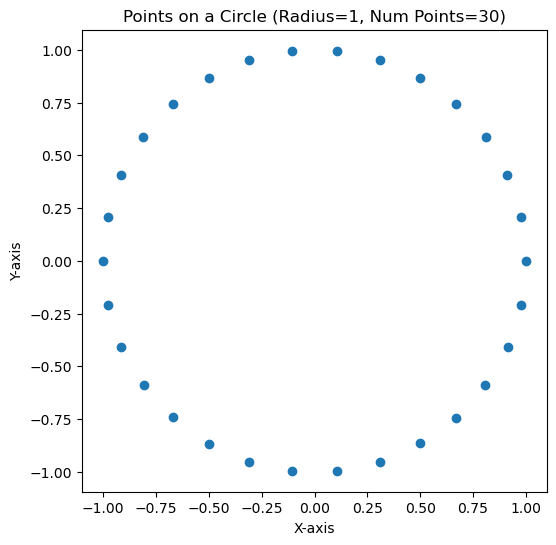

In [3]:
def linspace_circle(radius, num_points):
    points = []
    for i in range(num_points):
        angle = 2 * math.pi * i / num_points  
        x = radius * math.cos(angle)  
        y = radius * math.sin(angle)  
        
        noise_x = random.uniform(-0.001, 0.001)  # Adjust the range as needed
        noise_y = random.uniform(-0.001, 0.001)  # Adjust the range as needed

        x += noise_x
        y += noise_y
        
        points.append((x, y))  
    return points

circle_radius = 1
num_points = 30

circle_points = linspace_circle(circle_radius, num_points)
print(circle_points)

x_coords, y_coords = zip(*circle_points)

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords)
plt.title(f'Points on a Circle (Radius={circle_radius}, Num Points={num_points})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')  
plt.show()

In [4]:
def multivariate_vandermonde_matrix(data, degree):
    variables = [f'x{i}' for i in range(degree)]
    monomials = generate_monomials(variables, degree)
    print(monomials)
    vand = []
    for d in data:
        vals = {f'x{i}':d[i] for i in range(len(d))}
        vand.append([eval(monomials[i], vals) for i in range(len(monomials))])
        
    return np.stack(vand)

data = circle_points
degree = 2

A = np.array(multivariate_vandermonde_matrix(data, degree))

def find_kernel(A):
    U, S, Vt = np.linalg.svd(A)
    tolerence = np.finfo(np.float64).eps * np.max(S[0]) * max(A.shape)
    count = np.sum(S < tolerence)
    return Vt[-count:,:]

basis = np.linalg.lstsq(A, np.zeros(A.shape[0]), rcond='warn')
basis
# basis = find_kernel(A.T @ A)
# basis



['1', 'x1', 'x0', 'x1 * x1', 'x0 * x1', 'x0 * x0']


C:\Users\Shawn's ThinkPad\AppData\Local\Temp\ipykernel_26796\2318843820.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  basis = np.linalg.lstsq(A, np.zeros(A.shape[0]), rcond='warn')


(array([0., 0., 0., 0., 0., 0.]),
 array([0.]),
 6,
 array([6.70850765e+00, 3.87348900e+00, 3.87300446e+00, 2.74073691e+00,
        1.93551380e+00, 3.22320580e-03]))

In [5]:
import numpy as np

def generate_noisy_circle_data(radius, num_points, noise_level=0.1):
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    x = radius * np.cos(angles) + np.random.normal(0, noise_level, num_points)
    y = radius * np.sin(angles) + np.random.normal(0, noise_level, num_points)
    return np.column_stack((x, y))

radius = 1
num_points = 1000
noise_level = 0.01
Sm = generate_noisy_circle_data(radius, num_points, noise_level)


epsilon = 0.05
vca = VCA(Sm, epsilon)
vca.fit(print_D=True)

for vec in vca.f_V:
    print(vec)



largest singular value 22.3619, lowest singular value 22.3515
largest singular value 0.0316467, lowest singular value 0.000920514
-0.0013778811665956872x² + 0.0006488559734894673xy + 2.2284595909389535e-06x + 0.0013761534764972808y² + -2.7149546931012824e-07y + 2.0983074505644302e-07
0.00022985734198742322x² + 0.0019475645342858048xy + -1.6612218608123018e-06x + -0.00022823851926595493y² + 2.4805684453868495e-06y + -8.105910107485834e-07
0.0014150209009258631x² + -1.319358827417275e-06xy + 2.596128460882399e-09x + 0.0014144167032504758y² + -1.7754783718225312e-06y + -0.0014142129189941514


In [6]:
import numpy as np

def generate_twisted_cubic_data(num_points, start=0, end=1):
    t = np.linspace(start, end, num_points)
    x = t
    y = t**2
    z = t**3
    return np.column_stack((x, y, z))


num_points = 10000  
Sm = generate_twisted_cubic_data(num_points)

epsilon = 0.1
vca = VCA(Sm, epsilon)
vca.fit(print_D=True)

for vec in vca.f_V:
    print(vec)


largest singular value 49.5561, lowest singular value 0.98409
largest singular value 0.0138227, lowest singular value 5.15493e-17
-0.0020560045963085465x² + 0.0036653644258464405xy + 0.005862420977911132xz + 1.8431436932253575e-18x + -0.0058624209779111775y² + 6.613633252161577e-17yz + 0.0020560045963085457y + -3.144186300207963e-17z² + -0.003665364425846431z + -8.402566836762659e-19
-0.07742182031590256x² + 0.33868799706796765xy + -0.21195202900165547xz + 0.015495498277046911x + -0.3864436066139764y² + 0.5006469176007345yz + -0.03441766734386715y + -0.16628639649539037z² + 0.021705280958641285z + -0.000573009112899619
0.06843607564997901x² + -0.2939953270882228xy + 0.17286540090060143xz + -0.011742314906074464x + 0.29699375340559675y² + -0.32969277207112957yz + 0.027224391103250735y + 0.08603615094186501z² + -0.01669291946620809z + 0.0003424767429788479
-0.0037233559910390406x² + 0.004233299184756415xy + 0.010760287246170104xz + -3.0054084221298183e-16x + -0.010760287246170517y² + 3.9